In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sympy.printing.pretty.pretty_symbology import line_width

x, y = load_diabetes(return_X_y=True)
x = x[:, [2]] # use only one feature
xtr, xts, ytr, yts = train_test_split(x, y, test_size=20, shuffle=True)

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(xtr, ytr)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

ypr = regressor.predict(xts)

In [4]:
print(f"Mean squared error: {mean_squared_error(yts, ypr):.2f}")
print(f"Coefficient of determination: {r2_score(yts, ypr):.2f}")

Mean squared error: 2938.09
Coefficient of determination: 0.45


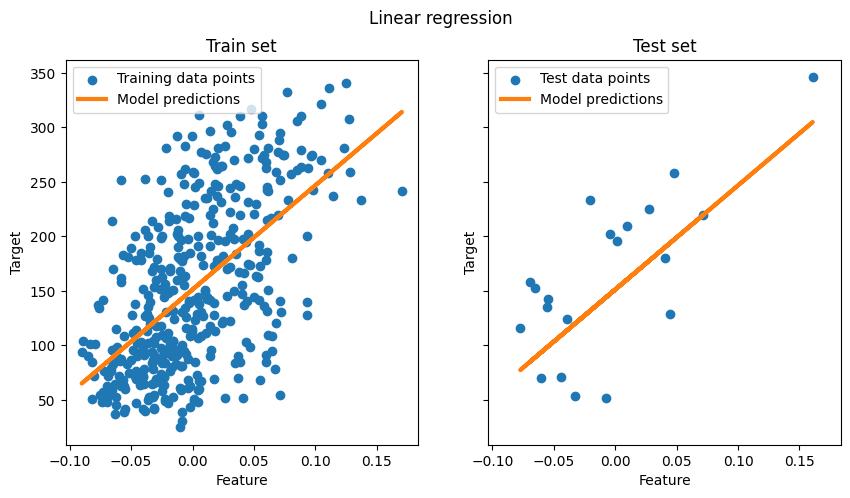

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(xtr, ytr, label="Training data points")
ax[0].plot(
    xtr,
    regressor.predict(xtr),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(xts, yts, label="Test data points")
ax[1].plot(xts, ypr, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear regression")
plt.show()

In [7]:
"""
في الأبعاد العالية تكون مصفوفة البيانات شديدة ال correlated
w=(XTX)−1XTy
المصفوفة الاللي مفروض تتعكس هتكون linearly dependent وبالتالي معكوسة هيكون هزيل شديد التاثر بتغير قيمها
وبتفسير اخر؛ فان ال ols يحاول ان يوجد افضل بارامتر لكل الابعاد حتى لو كان فيها ضوضاء فهو بالتالي يحاول ي fit مع الضوضاء => وهذا هو بعينه ال overfitting
"""

'\nفي الأبعاد العالية تكون مصفوفة البيانات شديدة ال correlated\nw=(XTX)−1XTy\nالمصفوفة الاللي مفروض تتعكس هتكون linearly dependent وبالتالي معكوسة هيكون هزيل شديد التاثر بتغير قيمها\nوبتفسير اخر؛ فان ال ols يحاول ان يوجد افضل بارامتر لكل الابعاد حتى لو كان فيها ضوضاء فهو بالتالي يحاول ي fit مع الضوضاء => وهذا هو بعينه ال overfitting\n'

Ordinary Least Squares Complexity => n_samples * n_features^2 (linear in samples)